## Frozen Lake mit Q-Learning und Double-Q-Learning

##### Der Ansatz des Q-Learnings stammt von Maxime Labonne (2022): Q-learning for beginners - Towards Data Science, in: Medium https://towardsdatascience.com/q-learning-for-beginners-2837b777741
##### Die Implementation des Double-Q-Learnings stammt von mir 

In [1]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()
#environment.render()

0

In [3]:
# Erstellen der Q-Tabelle
qtable = np.zeros((16, 4)) # (rows x columns) = (states x actions) = (16 x 4)

nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Q-Learning für 130 Episoden

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.43041111 0.38724252 0.47823565 0.43041111]
 [0.43040756 0.         0.53142382 0.47823062]
 [0.47822205 0.64310085 0.4774665  0.53131755]
 [0.53130716 0.         0.47761787 0.46795634]
 [0.38619356 0.28153515 0.         0.43028124]
 [0.         0.         0.         0.        ]
 [0.         0.72754922 0.         0.51182508]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.38233169]
 [0.         0.         0.         0.        ]
 [0.         0.80919    0.         0.64240583]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.8019     0.9        0.708588  ]
 [0.

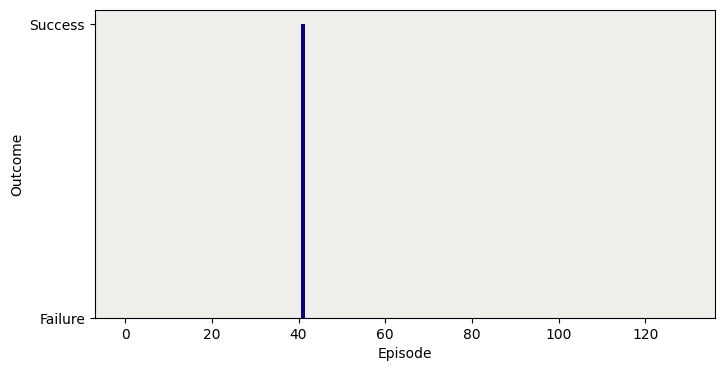

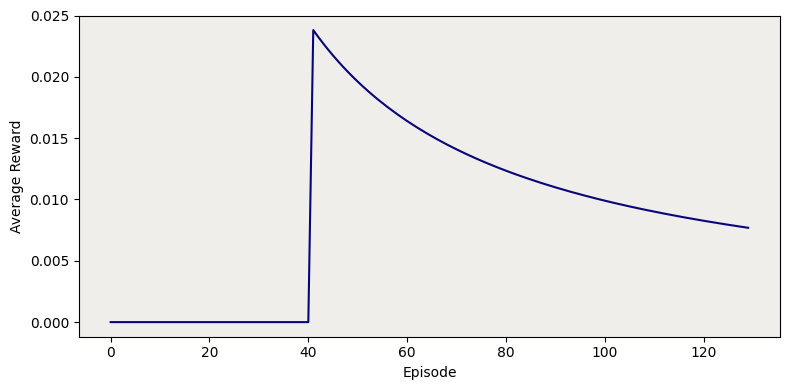

In [4]:
# Setzen des Seeds
seed = 42
np.random.seed(seed)
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.action_space.seed(seed)
environment.observation_space.seed(seed)

# Initialisieren der Q-Tabelle
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameter
episodes = 130        # Anzahl der Episoden
alpha = 0.9           # Lernrate
gamma = 0.9           # Discount-Faktor
epsilon = 1.0         # Zufälligkeitsgrad bei der Aktionsauswahl
epsilon_decay = 0.001 # Fester Betrag zur Verringerung

# Erstellen von leeren Listen für Ergebnisse und Rewards zum Plotten
outcomes = []
rewards = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset(seed=seed)
    done = False
    total_reward = 0

    # Standardmäßig wird das Ergebnis zunächst als Fehlschlag betrachtet, in Liste outcomes gespeichert
    outcomes.append("Failure")
    
    # Bis der Agent in ein Loch fällt oder das Ziel erreicht, läuft das Training weiter
    while not done:
        # Generieren einer Zufallszahl zwischen 0 und 1
        rnd = np.random.random()

        # Wenn Zufallszahl < epsilon, wählen einer zufälligen Aktion
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Andernfalls wählen der Aktion mit dem höchsten Wert im aktuellen Zustand
        else:
            action = np.argmax(qtable[state])
             
        # Ausführen der Aktion und bewegen des Agenten in die gewünschte Richtung
        new_state, reward, done, info = environment.step(action)

        # Update der Q-Tabelle für (state,action)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Aktualisieren des aktuellen Zustands
        state = new_state

        # Summieren der Belohnungen
        total_reward += reward

        # Wenn eine Belohnung erhalten wurde, bedeutet das, dass das Ergebnis ein Erfolg ist, in Liste outcomes gespeichert
        if reward:
            outcomes[-1] = "Success"

    # Speichern des Gesamtrewards der Episode in Liste rewards
    rewards.append(total_reward)

    # Updaten von epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Ergebnisse plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)

# Durchschnittliche Rewards plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.plot(range(len(rewards)), np.cumsum(rewards) / (np.arange(len(rewards)) + 1), color="#0A047A")

plt.tight_layout()
plt.show()

### Q-Learning für 1000 Episoden

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


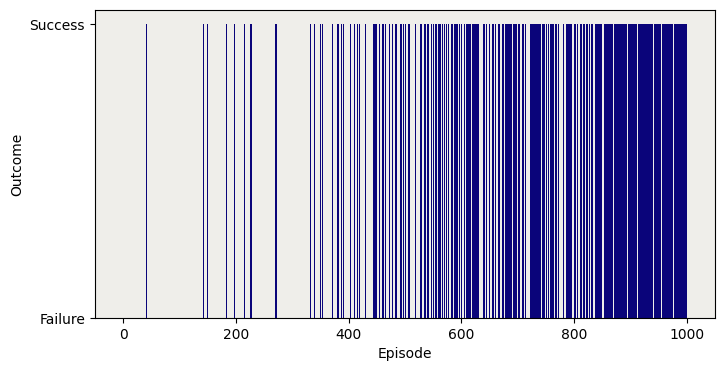

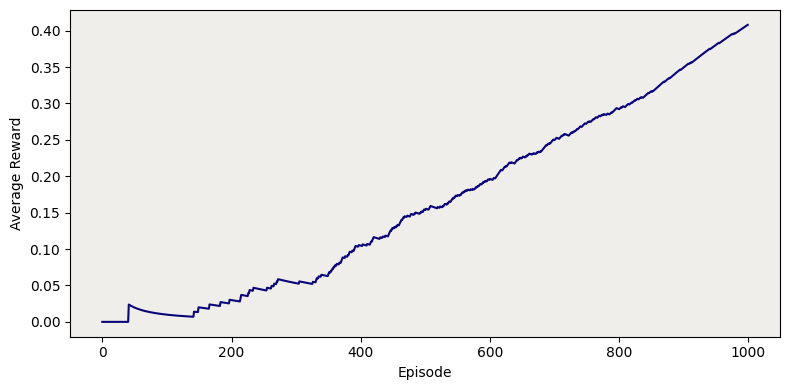

In [5]:
# Setzen des Seeds
seed = 42
np.random.seed(seed)
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.action_space.seed(seed)
environment.observation_space.seed(seed)

# Initialisieren der Q-Tabelle
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameter
episodes = 1000        # Anzahl der Episoden
alpha = 0.9           # Lernrate
gamma = 0.9           # Discount-Faktor
epsilon = 1.0         # Zufälligkeitsgrad bei der Aktionsauswahl
epsilon_decay = 0.001 # Fester Betrag zur Verringerung

# Erstellen von leeren Listen für Ergebnisse und Rewards zum Plotten
outcomes = []
rewards = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset(seed=seed)
    done = False
    total_reward = 0

    # Standardmäßig wird das Ergebnis zunächst als Fehlschlag betrachtet, in Liste outcomes gespeichert
    outcomes.append("Failure")
    
    # Bis der Agent in ein Loch fällt oder das Ziel erreicht, läuft das Training weiter
    while not done:
        # Generieren einer Zufallszahl zwischen 0 und 1
        rnd = np.random.random()

        # Wenn Zufallszahl < epsilon, wählen einer zufälligen Aktion
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Andernfalls wählen der Aktion mit dem höchsten Wert im aktuellen Zustand
        else:
            action = np.argmax(qtable[state])
             
        # Ausführen der Aktion und bewegen des Agenten in die gewünschte Richtung
        new_state, reward, done, info = environment.step(action)

        # Update der Q-Tabelle für (state,action)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Aktualisieren des aktuellen Zustands
        state = new_state

        # Summieren der Belohnungen
        total_reward += reward

        # Wenn eine Belohnung erhalten wurde, bedeutet das, dass das Ergebnis ein Erfolg ist, in Liste outcomes gespeichert
        if reward:
            outcomes[-1] = "Success"

    # Speichern des Gesamtrewards der Episode in Liste rewards
    rewards.append(total_reward)

    # Updaten von epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Ergebnisse plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)

# Durchschnittliche Rewards plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.plot(range(len(rewards)), np.cumsum(rewards) / (np.arange(len(rewards)) + 1), color="#0A047A")

plt.tight_layout()
plt.show()

### Double-Q-Learning für 130 Episoden

Q-tables before training:
Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-tables after training:
Q-table 1:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.9 0. ]
 [0.  0.  0.  0. ]]
Q-table 2:
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0

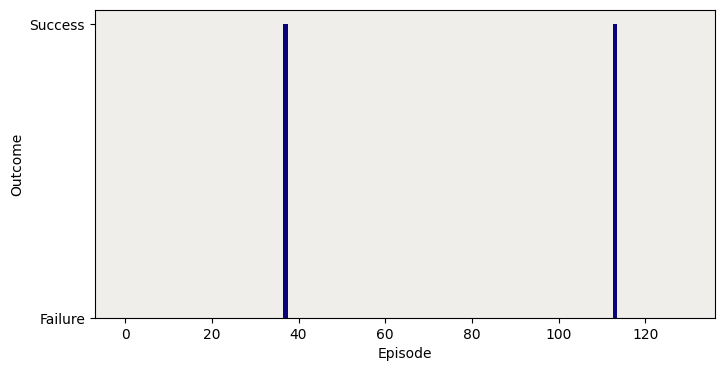

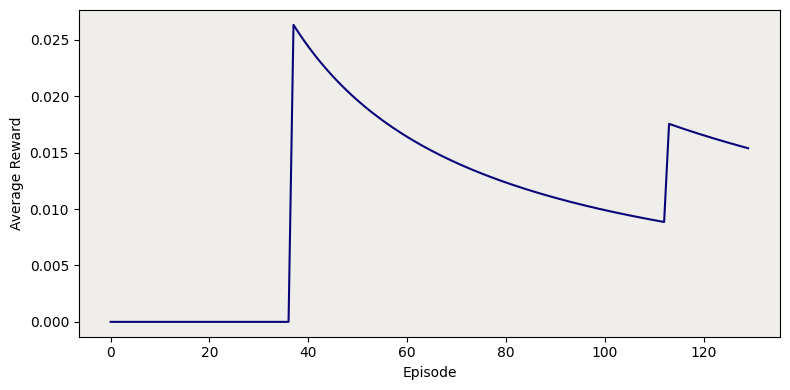

In [6]:
# Setzen des Seeds
seed = 42
np.random.seed(seed)
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.action_space.seed(seed)
environment.observation_space.seed(seed)

# Initialisieren der beiden Q-Tabellen
qtable1 = np.zeros((environment.observation_space.n, environment.action_space.n))
qtable2 = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameter
episodes = 130        # Anzahl der Episoden
alpha = 0.9           # Lernrate
gamma = 0.9           # Discount-Faktor
epsilon = 1.0         # Zufälligkeitsgrad bei der Aktionsauswahl
epsilon_decay = 0.001 # Fester Betrag zur Verringerung

# Erstellen von leeren Listen für Ergebnisse und Rewards zum Plotten
outcomes = []
rewards = []

print('Q-tables before training:')
print('Q-table 1:')
print(qtable1)
print('Q-table 2:')
print(qtable2)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    total_reward = 0

    # Standardmäßig wird das Ergebnis zunächst als Fehlschlag betrachtet, in Liste outcomes gespeichert
    outcomes.append("Failure")
    
    # Bis der Agent in ein Loch fällt oder das Ziel erreicht, läuft das Training weiter
    while not done:
        # Generieren einer Zufallszahl zwischen 0 und 1
        rnd = np.random.random()

        # Wenn Zufallszahl < epsilon, wählen einer zufälligen Aktion
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Andernfalls wählen der Aktion mit dem höchsten Wert im aktuellen Zustand
        else:
            action = np.argmax(qtable1[state] + qtable2[state])
             
        # Ausführen der Aktion und bewegen des Agenten in die gewünschte Richtung
        new_state, reward, done, info = environment.step(action)

        # Zufällig wählen, welche Q-Tabelle aktualisiert wird
        if np.random.random() < 0.5:
            # Update Q1
            best_action = np.argmax(qtable1[new_state])
            qtable1[state, action] = qtable1[state, action] + \
                                     alpha * (reward + gamma * qtable2[new_state, best_action] - qtable1[state, action])
        else:
            # Update Q2
            best_action = np.argmax(qtable2[new_state])
            qtable2[state, action] = qtable2[state, action] + \
                                     alpha * (reward + gamma * qtable1[new_state, best_action] - qtable2[state, action])
        
        # Aktualisieren des aktuellen Zustands
        state = new_state

        # Summieren der Belohnungen
        total_reward += reward

        # Wenn eine Belohnung erhalten wurde, bedeutet das, dass das Ergebnis ein Erfolg ist, in Liste outcomes gespeichert
        if reward:
            outcomes[-1] = "Success"

    # Speichern des Gesamtrewards der Episode in Liste rewards
    rewards.append(total_reward)

    # Updaten von epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-tables after training:')
print('Q-table 1:')
print(qtable1)
print('Q-table 2:')
print(qtable2)

# Ergebnisse plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)

# Durchschnittliche Rewards plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.plot(range(len(rewards)), np.cumsum(rewards) / (np.arange(len(rewards)) + 1), color="#0A047A")

plt.tight_layout()
plt.show()

### Double-Q-Learning für 1000 Episoden

Q-tables before training:
Q-table 1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q-table 2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-tables after training:
Q-table 1:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.5888821 ]
 [0.58927185 0.729      0.58857826 0.65609993]
 [0.65603432 0.         0.         0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.64946968]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561  

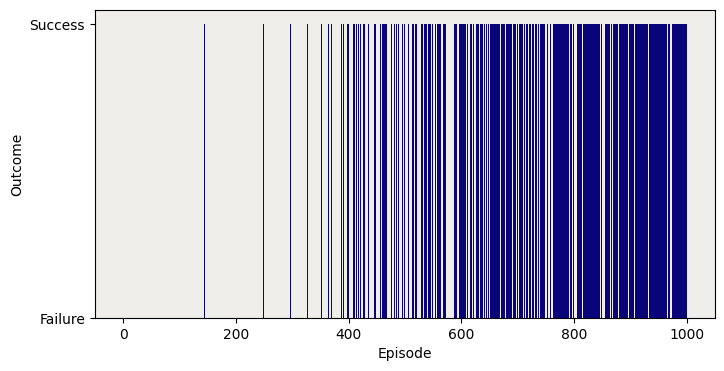

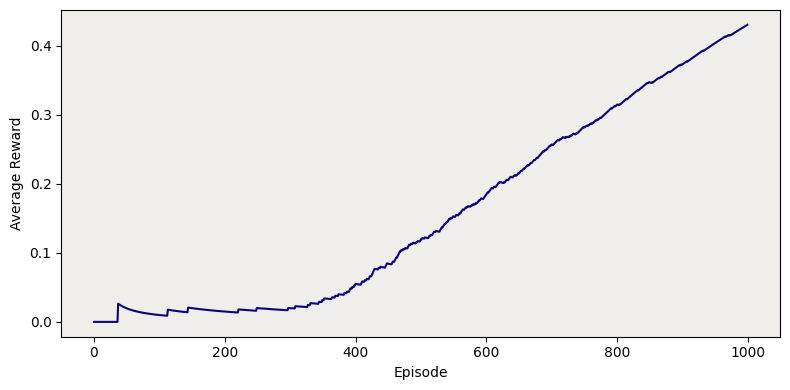

In [7]:
# Setzen des Seeds
seed = 42
np.random.seed(seed)
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.action_space.seed(seed)
environment.observation_space.seed(seed)

# Initialisieren der beiden Q-Tabellen
qtable1 = np.zeros((environment.observation_space.n, environment.action_space.n))
qtable2 = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameter
episodes = 1000        # Anzahl der Episoden
alpha = 0.9           # Lernrate
gamma = 0.9           # Discount-Faktor
epsilon = 1.0         # Zufälligkeitsgrad bei der Aktionsauswahl
epsilon_decay = 0.001 # Fester Betrag zur Verringerung

# Erstellen von leeren Listen für Ergebnisse und Rewards zum Plotten
outcomes = []
rewards = []

print('Q-tables before training:')
print('Q-table 1:')
print(qtable1)
print('Q-table 2:')
print(qtable2)

# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    total_reward = 0

    # Standardmäßig wird das Ergebnis zunächst als Fehlschlag betrachtet, in Liste outcomes gespeichert
    outcomes.append("Failure")
    
    # Bis der Agent in ein Loch fällt oder das Ziel erreicht, läuft das Training weiter
    while not done:
        # Generieren einer Zufallszahl zwischen 0 und 1
        rnd = np.random.random()

        # Wenn Zufallszahl < epsilon, wählen einer zufälligen Aktion
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Andernfalls wählen der Aktion mit dem höchsten Wert im aktuellen Zustand
        else:
            action = np.argmax(qtable1[state] + qtable2[state])
             
        # Ausführen der Aktion und bewegen des Agenten in die gewünschte Richtung
        new_state, reward, done, info = environment.step(action)

        # Zufällig wählen, welche Q-Tabelle aktualisiert wird
        if np.random.random() < 0.5:
            # Update Q1
            best_action = np.argmax(qtable1[new_state])
            qtable1[state, action] = qtable1[state, action] + \
                                     alpha * (reward + gamma * qtable2[new_state, best_action] - qtable1[state, action])
        else:
            # Update Q2
            best_action = np.argmax(qtable2[new_state])
            qtable2[state, action] = qtable2[state, action] + \
                                     alpha * (reward + gamma * qtable1[new_state, best_action] - qtable2[state, action])
        
        # Aktualisieren des aktuellen Zustands
        state = new_state

        # Summieren der Belohnungen
        total_reward += reward

        # Wenn eine Belohnung erhalten wurde, bedeutet das, dass das Ergebnis ein Erfolg ist, in Liste outcomes gespeichert
        if reward:
            outcomes[-1] = "Success"

    # Speichern des Gesamtrewards der Episode in Liste rewards
    rewards.append(total_reward)

    # Updaten von epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-tables after training:')
print('Q-table 1:')
print(qtable1)
print('Q-table 2:')
print(qtable2)

# Ergebnisse plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)

# Durchschnittliche Rewards plotten
plt.figure(figsize=(8, 4))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.plot(range(len(rewards)), np.cumsum(rewards) / (np.arange(len(rewards)) + 1), color="#0A047A")

plt.tight_layout()
plt.show()